## PyNormaliz

Normaliz is a tool for computing the Hilbert bases and enumerative data of rational cones and, more generally, sets of lattice points in rational polyhedra.

### Example 1: A cone in dimension 2

We want to investigate the cone $C=\mathbb{R}_{+}(2,1)+\mathbb{R}_{+}(1,3)\subset\mathbb{R}^2$:

This cone is defined in the input file 2cone.in:

<pre>
amb_space 2 
cone 2
1 3
2 1
</pre>

The input tells Normaliz that the ambient space is R2, and then a cone with 2 generators is defined, namely the cone C from above.
The figure indicates the Hilbert basis, and this is our first computation goal.
If you prefer to consider the columns of a matrix as input vectors (or have got a matrix in this format from another system) you can use the input

Calculate the Hilbert basis from finite vectors.

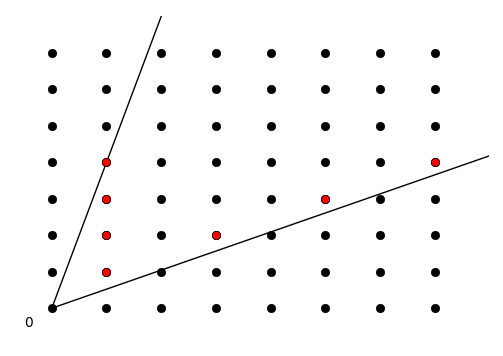

('Hilbert Bases:',
 [[1L, 1L],
  [1L, 2L],
  [1L, 3L],
  [1L, 4L],
  [3L, 2L],
  [5L, 3L],
  [7L, 4L],
  [9L, 5L],
  [11L, 6L],
  [13L, 7L],
  [15L, 8L],
  [17L, 9L],
  [19L, 10L],
  [21L, 11L],
  [44L, 23L],
  [67L, 35L],
  [90L, 47L]])

In [1]:
%pylab inline
from __future__ import print_function
import PyNormaliz
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

vectors = [[2,1],[1,4]]
cone = PyNormaliz.NmzCone("cone",vectors)
HB = PyNormaliz.NmzResult(cone,"HilbertBasis")
    
# Draw background lattice.
xLattice = np.arange(-1,8)
yLattice = np.arange(-1,8)

def pltHilbertBasis(theta=np.pi/10):
    fig,ax = plt.subplots()
    plt.ylim([-0.5,8])
    plt.xlim([-0.5,8])
    ax.axis('off')
    vectors[0][0],vectors[0][1] = np.cos(theta)*2, np.sin(theta)*2
    ratio = vectors[0][0] / vectors[0][1]
    integers = Fraction.from_float(ratio).limit_denominator(100)
    # TODO: Solve for >2 dimensions.
    # for ind,d in enumerate(vectors[0]): 
    #     integers = Fraction.from_float(d).limit_denominator(100)

    vectors[0][0] = integers.numerator
    vectors[0][1] = integers.denominator
    for x in xLattice:
        for y in yLattice:
            plt.plot(x,y,'ko')

    # Plot bounding vectors.
    for v in vectors:
        ax.plot([0,v[0]*2],[0,v[1]*2],'k-')
    
    cone = PyNormaliz.NmzCone("cone",vectors)
    HB = PyNormaliz.NmzResult(cone,"HilbertBasis")
    xList = [x for x,y in HB]
    yList = [y for x,y in HB]

    # TODO: Complete fill_between function.
    # x = np.arange(0,0.1,2)
    # y1 = x*2
    # y2 = x*3
    # ax.fill_between(x,y1,y2,where=y2>=y1,facecolor='green', interpolate=True)
    # Plot Hilbert basis.
    ax.plot(xList,yList,'ro')
    ax.annotate(str(0), (-.5,-.5))
    plt.show()
    return "Hilbert Bases:", HB

w = interactive(pltHilbertBasis, theta=(0.01,np.pi/2,np.pi/40))
display(w)